In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
# 1. 데이터 로드

spam_df = pd.read_csv(
    "data/spambase.data",
    header = None,       # 첫 줄에 있는 데이터가 header가 되지 않도록 함
    names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "is_spam"]
    )
spam_df.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [63]:
# 임계점 확인
len(spam_df[spam_df['capital_run_length_longest']>=22])

# 임계점을 기준으로 1, 0 분리
j=0
for i in spam_df['capital_run_length_longest']:
    if i>=22:
        spam_df['capital_run_length_longest'][j] = 1
    else:
        spam_df['capital_run_length_longest'][j] = 0
    j+=1

In [64]:
# length_longest 변경사항 확인
spam_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,1,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,1,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,1,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,1,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,1,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,0,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,0,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,0,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,0,78,0


In [65]:
# is_spam 0, 1 개수 확인
len(spam_df[spam_df['is_spam']==0]),len(spam_df[spam_df['is_spam']==1])

(2788, 1813)

In [66]:
# length 관련 데이터를 0, 1로 바꾼 뒤 쓸 것
# sns.countplot(data=df, x='is_spam', hue='capital_run_length_')
# plt.show()

In [67]:
# # x축, y축, s=점의 크기, c=점의 색상(컬러 값으로 연속 데이터 표현)
# # 몇 가지 컬럼들로 scatter 찍어봐도 괜찮을듯

# plt.scatter(spam_df['ad_budget'], spam_df['sales'], s=spam_df['visitor'], c=spam_df['colors'])

# plt.colorbar()

# plt.xlabel('광고비')
# plt.ylabel('판매량')
# plt.show()

In [68]:
# # 값들이 최대한 많이 있는 하나의 row를 통해 pie차트를 만들어봐도 좋을듯
# plt.pie(
#     df['sales'],
#     labels=df['label'],
#     autopct='%.1f%%',
#     startangle=90,
#     explode=[.05, .05, .05, .05],
#     wedgeprops={'width': .6}
# )
# plt.text(0, 0, '스팸메일에 포함된 단어 비율?', ha='center', va='center')

# plt.show()

In [69]:
spam_df1 = spam_df

except_word = ["word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df1= spam_df1.drop(i, axis=1)

spam_df1
   

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,1
...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0


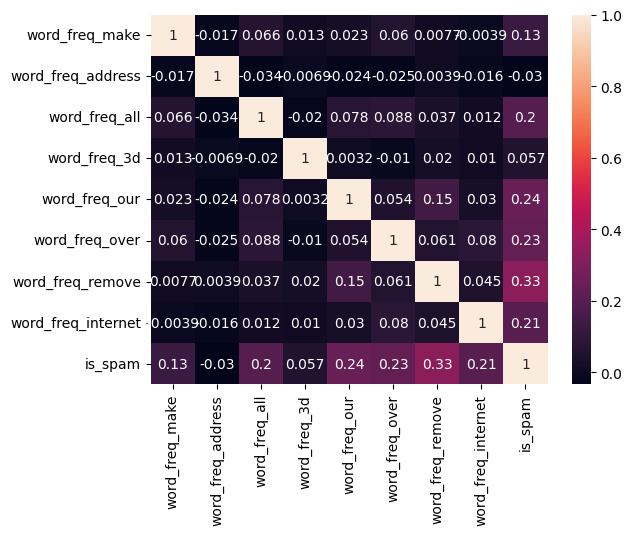

In [70]:
corr_matrix1 = spam_df1.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()

---

In [71]:
spam_df2 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df2 = spam_df2.drop(i, axis=1)
   

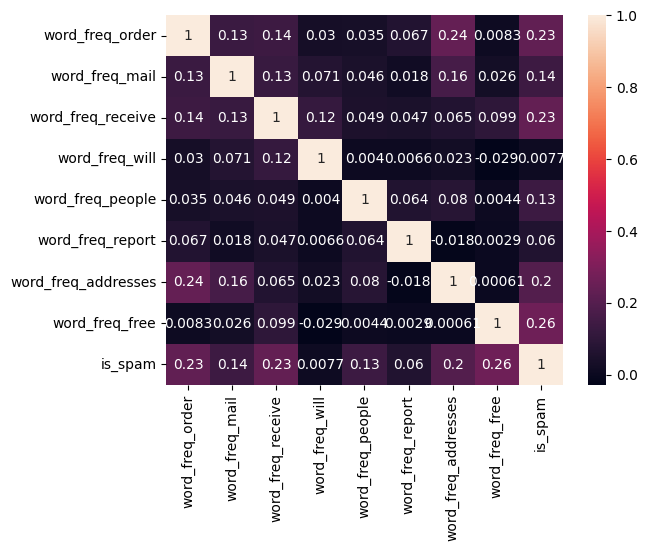

In [72]:
corr_matrix2 = spam_df2.corr()
corr_matrix2
sns.heatmap(corr_matrix2, annot=True)
plt.show()

---

In [73]:
spam_df3 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df3= spam_df3.drop(i, axis=1)
   

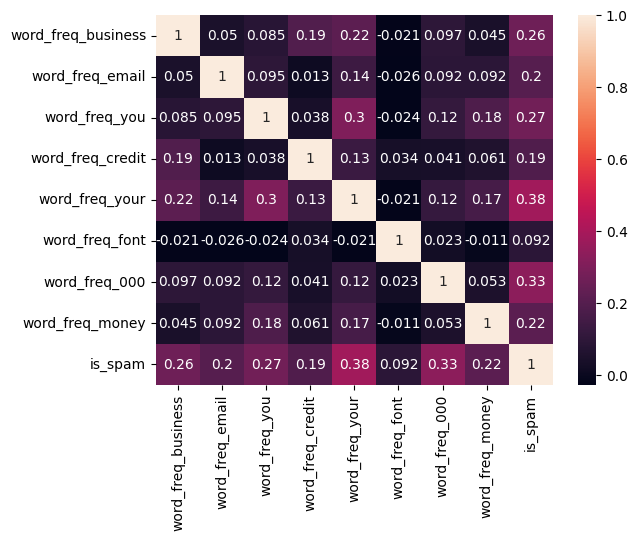

In [74]:
corr_matrix1 = spam_df3.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()

---

In [75]:
spam_df4 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_000", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_you", "word_freq_money", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df4= spam_df4.drop(i, axis=1)
   

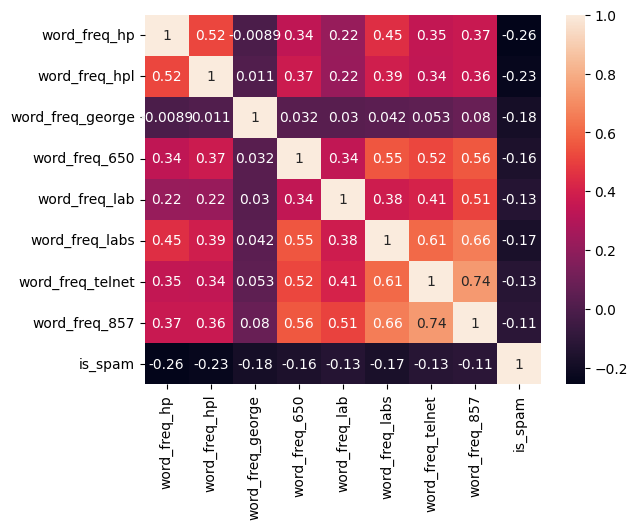

In [76]:
corr_matrix1 = spam_df4.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()

---

In [77]:
spam_df5 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df5= spam_df5.drop(i, axis=1)
   

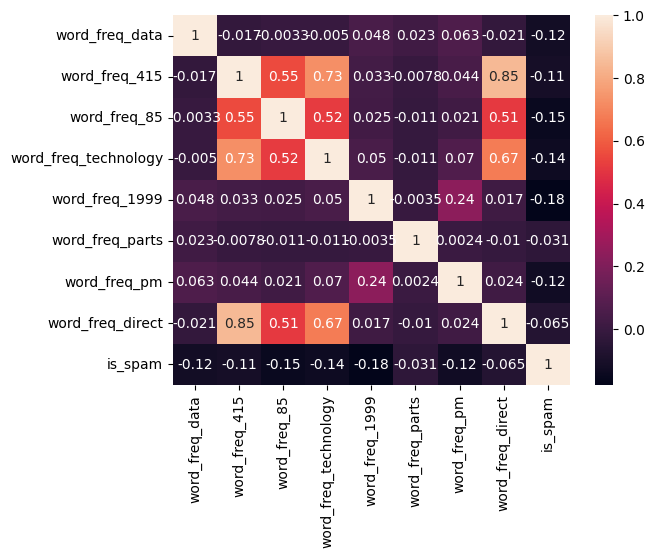

In [78]:
corr_matrix1 = spam_df5.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()

---

In [79]:
spam_df6 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

for i in except_word:
    spam_df6= spam_df6.drop(i, axis=1)
   

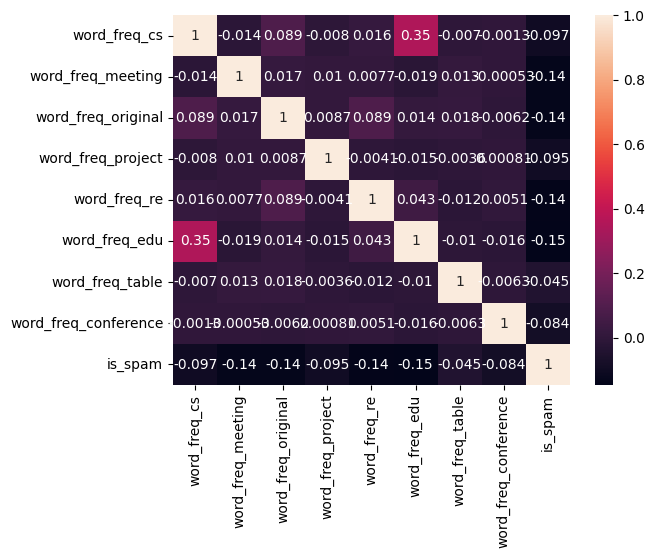

In [80]:
corr_matrix1 = spam_df6.corr()
corr_matrix1
sns.heatmap(corr_matrix1,annot=True)
plt.show()

---

In [81]:
spam_df7 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference"]

for i in except_word:
    spam_df7= spam_df7.drop(i, axis=1)
   

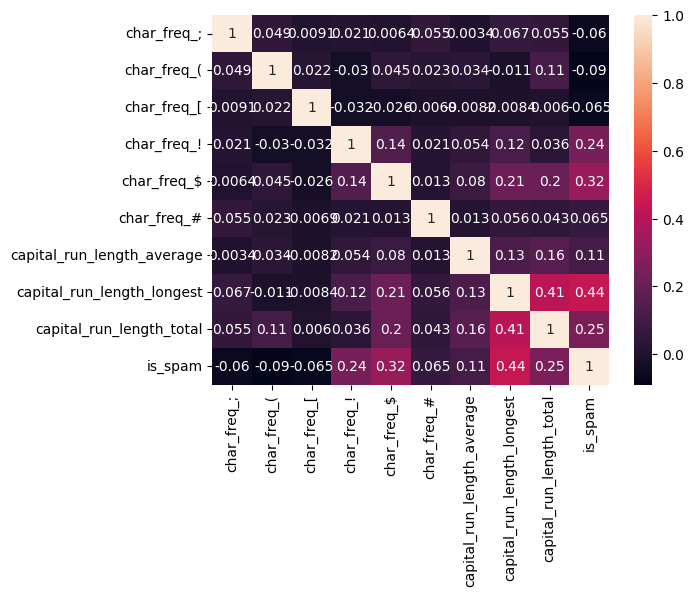

In [82]:
corr_matrix1 = spam_df7.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()

In [83]:
spam_df8 = spam_df

except_word = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "word_freq_george", "word_freq_data", "word_freq_1999", "word_freq_parts", "word_freq_pm"]

for i in except_word:
    spam_df8= spam_df8.drop(i, axis=1)
   

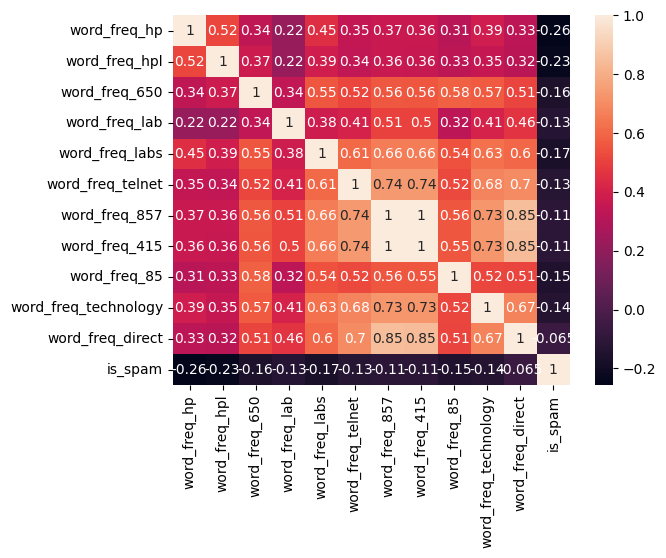

In [84]:
corr_matrix1 = spam_df8.corr()
corr_matrix1
sns.heatmap(corr_matrix1, annot=True)
plt.show()